In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import yfinance as yf
import pandas as pd

import sys
sys.path.append('../')
from label_algorithms import oracle
import utils as weights_utils
import backward_looking as bl
import forward_looking as fl
import sequential_return as sr
import trend_interval_return as tir

In [2]:
ticker_symbol = 'GC=F'
start_date = '2023-11-20'
end_date = '2023-11-21'
start_time = "10:50:00"
end_time = "12:00:00"

prices = yf.download(ticker_symbol, start_date, end_date, interval='1m')['Close'].between_time(start_time, end_time)
prices.index = prices.index.tz_localize(None)

fee = 0.0004
labels = oracle.binary_trend_labels(prices, fee=fee)

prices = prices[prices.index.isin(labels.index)]

[*********************100%%**********************]  1 of 1 completed


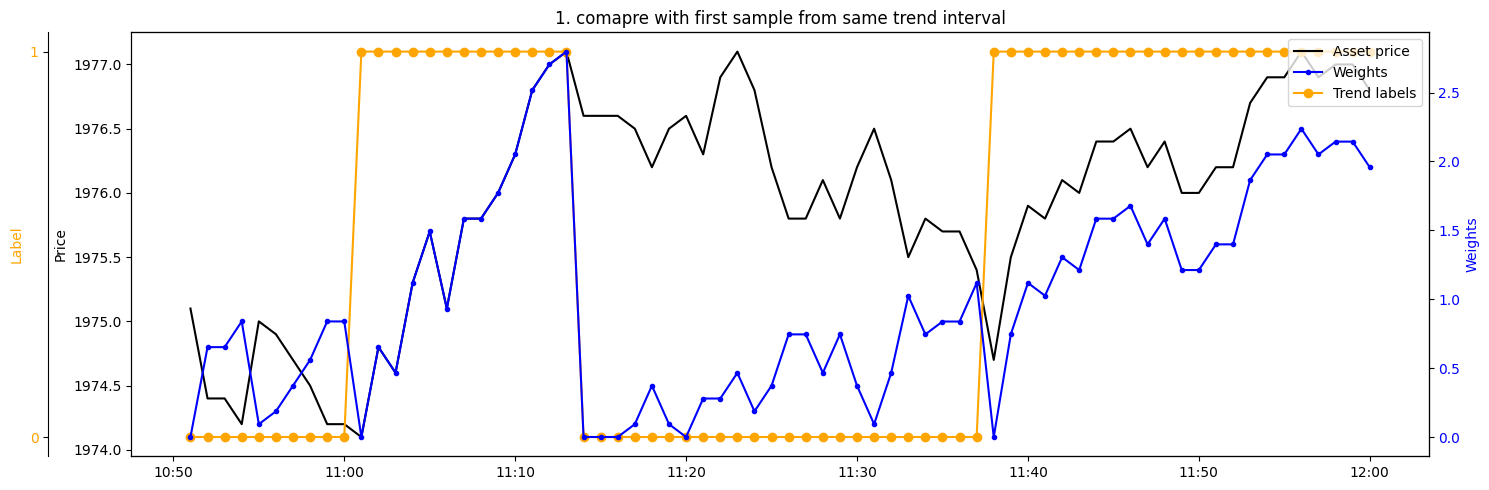

In [3]:
weights = bl.get_weights(prices, labels)
weights_utils.plot_weights('1. comapre with first sample from same trend interval', prices, labels, weights)

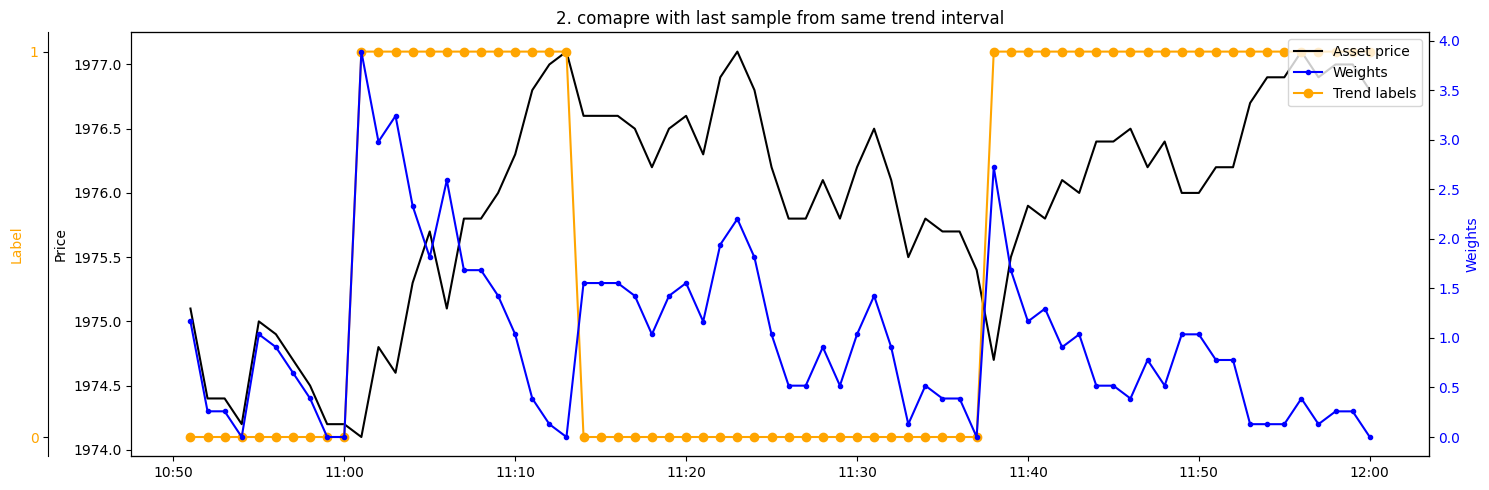

In [4]:
weights = fl.get_weights(prices, labels)
weights_utils.plot_weights('2. comapre with last sample from same trend interval', prices, labels, weights)

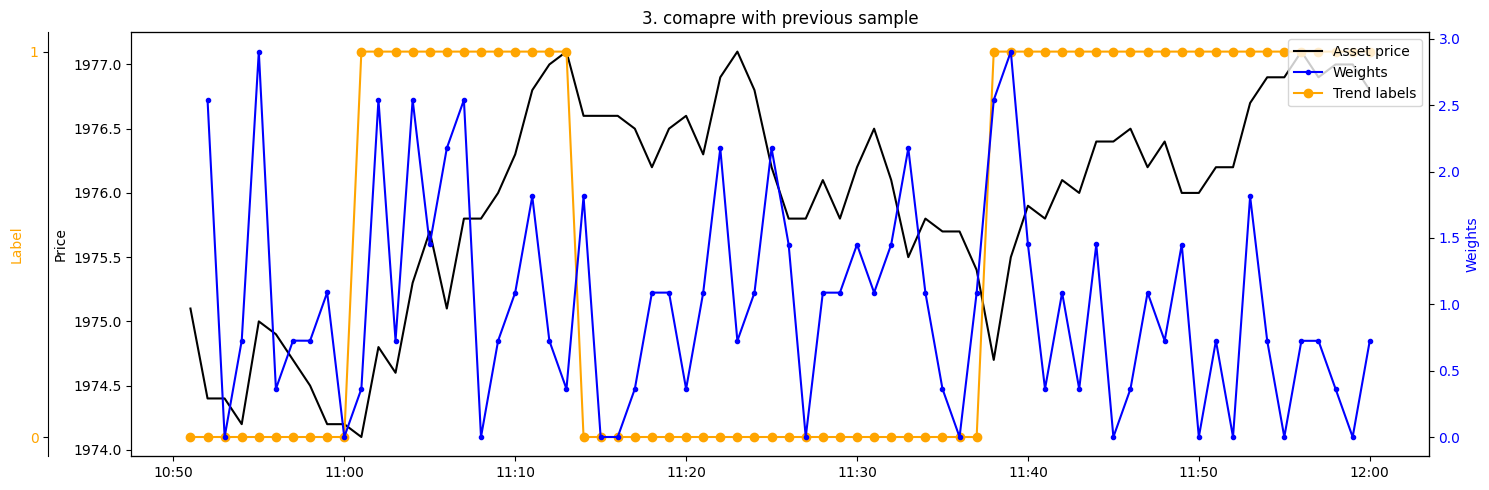

In [5]:
weights = sr.get_weights(prices, labels)
weights_utils.plot_weights('3. comapre with previous sample', prices, labels, weights)

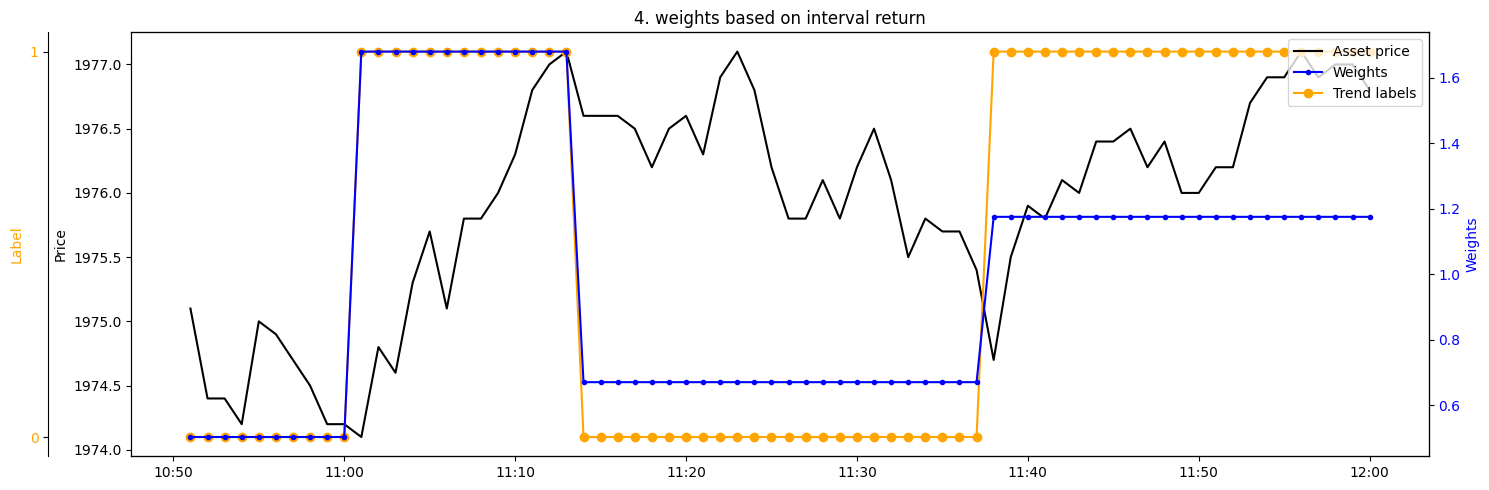

Datetime
2023-11-20 10:51:00    1975.099976
2023-11-20 10:52:00    1974.400024
2023-11-20 10:53:00    1974.400024
2023-11-20 10:54:00    1974.199951
2023-11-20 10:55:00    1975.000000
2023-11-20 10:56:00    1974.900024
2023-11-20 10:57:00    1974.699951
2023-11-20 10:58:00    1974.500000
2023-11-20 10:59:00    1974.199951
2023-11-20 11:00:00    1974.199951
Name: Close, dtype: float64
Datetime
2023-11-20 10:51:00    0.0
2023-11-20 10:52:00    0.0
2023-11-20 10:53:00    0.0
2023-11-20 10:54:00    0.0
2023-11-20 10:55:00    0.0
2023-11-20 10:56:00    0.0
2023-11-20 10:57:00    0.0
2023-11-20 10:58:00    0.0
2023-11-20 10:59:00    0.0
2023-11-20 11:00:00    0.0
dtype: float64
Datetime
2023-11-20 10:51:00    0.503575
2023-11-20 10:52:00    0.503575
2023-11-20 10:53:00    0.503575
2023-11-20 10:54:00    0.503575
2023-11-20 10:55:00    0.503575
2023-11-20 10:56:00    0.503575
2023-11-20 10:57:00    0.503575
2023-11-20 10:58:00    0.503575
2023-11-20 10:59:00    0.503575
2023-11-20 11:00:00   

In [6]:
weights = tir.get_weights(prices, labels)
weights_utils.plot_weights('4. weights based on interval return', prices, labels, weights)